<h1 align = "center">Machine Learning on the Titanic Dataset using Decision Tree Classifier</h1>

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the data**

In [2]:
data = pd.read_csv("../titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**EDA**

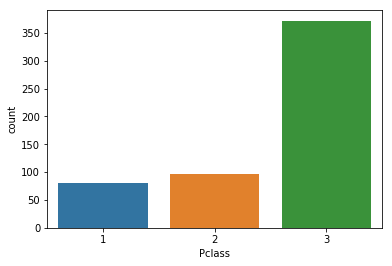

In [4]:
sns.countplot(x = 'Pclass', data = data[data['Survived'] != 1])

<p>Most people who died belonged to class 3</p> 

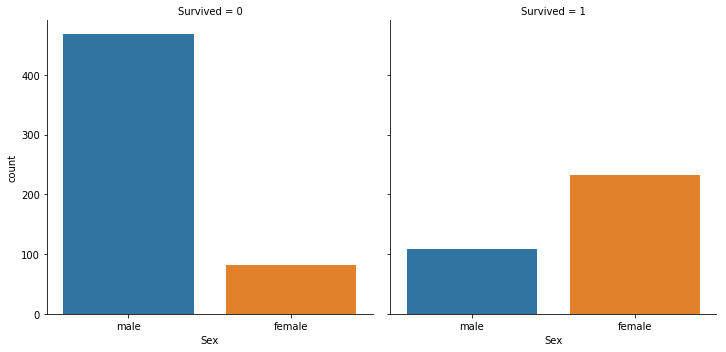

In [5]:
sns.catplot(x='Sex', col='Survived', kind='count', data=data);


Clearly a greater fraction of females survived.

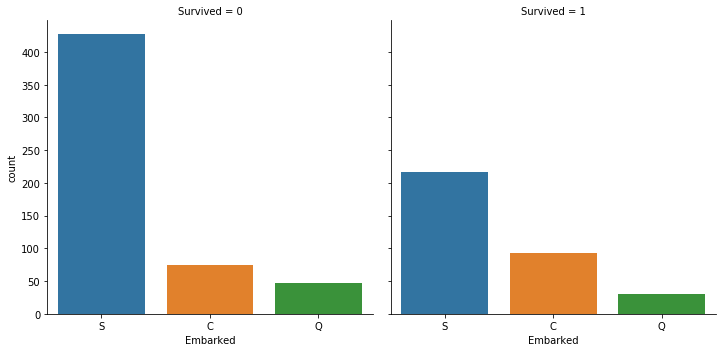

In [6]:
sns.catplot(x='Embarked', col='Survived', kind='count', data=data)


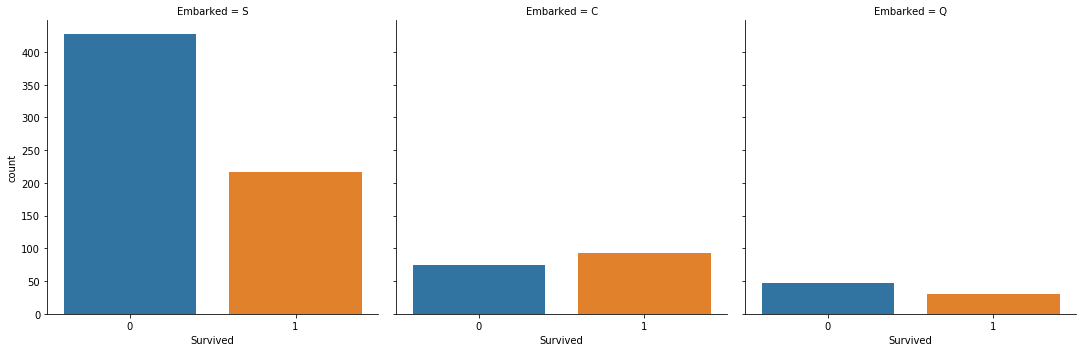

In [7]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=data);


If Embarked = S, then more likely to not survive.
If Embarked = C, then more likely to survive

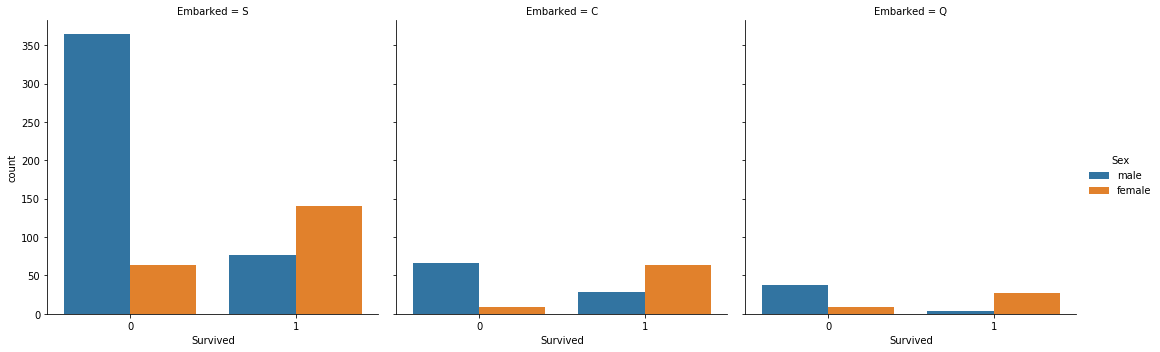

In [8]:
sns.catplot(x='Survived', col='Embarked', kind='count', hue = 'Sex', data=data);

<p>Most women of Embarked = C survived.</p>
<p>Most men of Embarked = S and Q died.</p>

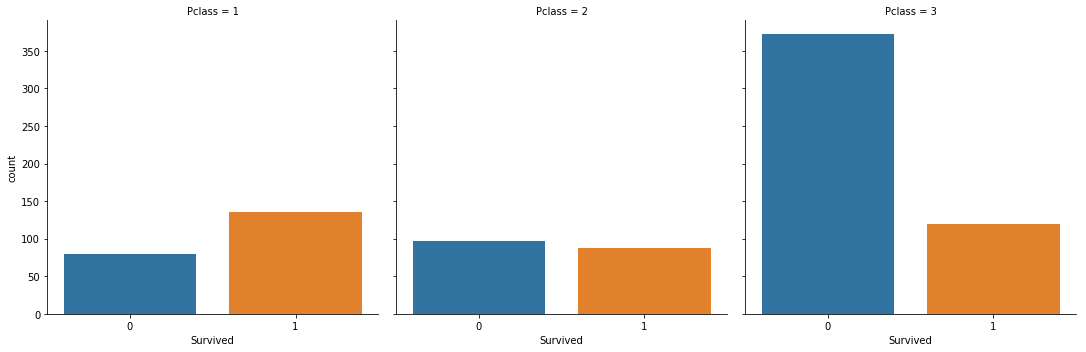

In [9]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=data);


Passengers in class 1 are more likely to survive and in class 3 are more likely to not.

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

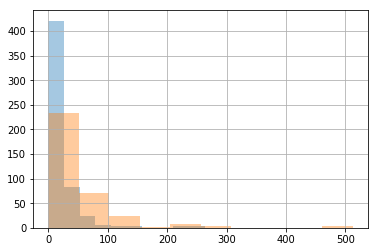

In [10]:
data_fare = data.groupby('Survived')
data_fare['Fare'].hist(alpha = 0.4)

People who paid more were more likely to survive

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

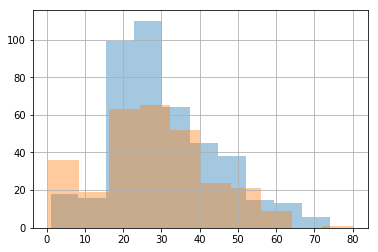

In [11]:
data_fare['Age'].hist(alpha = 0.4)

Children of the age 0-10 are more likely to survive.

In [12]:
data['relatives'] = (data['SibSp'] + data['Parch']) > 0

relatives
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

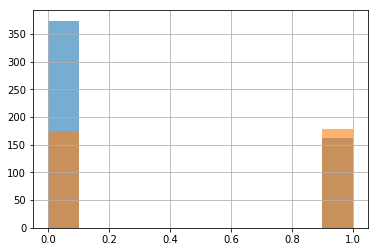

In [13]:
data_rel = data.groupby('relatives')
data_rel['Survived'].hist(alpha = 0.6)

More likely to survive if you have a relative.

**Data Preprocessing**

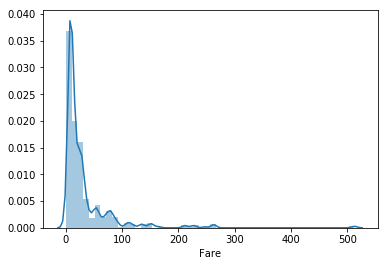

In [14]:
sns.distplot(data['Fare'])

In [15]:
bins = np.linspace(min(data['Fare']), max(data['Fare']), 6)
bin_names = [i for i in range(5)]

In [16]:
data['fare-binned'] = pd.cut(data['Fare'], bins, labels = bin_names, include_lowest = True )

In [17]:
for i in range(len(data)):
    if (data.loc[i, 'Embarked'] == 'S' and data.loc[i,'Sex'] == 'male'):
        data['Male-c'] = 1
    else:
        data['Male-c'] = 0

In [18]:
data = data.dropna()
data = data.reset_index()

In [19]:
from sklearn.preprocessing import LabelEncoder
data.loc[:, 'Embarked_le'] = LabelEncoder().fit_transform(data.loc[:, 'Embarked'])
data.loc[:, 'Sex_le'] = LabelEncoder().fit_transform(data.loc[:, 'Sex'])

In [20]:
test_data = data[['Age', 'Pclass', 'fare-binned', 'Embarked_le','Sex_le', 'relatives', 'Male-c']]
test_res = data[['Survived']]

**Splitting the dataset into training and testing sets**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test= train_test_split(test_data, test_res, test_size = 0.25)

**Machine Learning using Decision Trees**

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier()

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Prints the average score for three differnt train-test splits**

In [33]:
scores = list()
for i in range(3):
    X_train, X_test, y_train, y_test= train_test_split(test_data, test_res, test_size = 0.25)
    scores.append(clf.score(X_test, y_test))
print("The mean score of three different splittings is: %0.2f" % np.mean(scores))
    
    

The mean score of three different splittings is: 0.96


In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, test_data, test_res, cv=7)
print("The mean cross-validation score of three different splittings is: %0.2f" % np.mean(cv_scores))

The mean cross-validation score of three different splittings is: 0.80
